# Deep Reinforcement Learning for Keras

<table>
  <tr>
    <td><img src="img/breakout.gif?raw=true" width="200"></td>
    <td><img src="img/cartpole.gif?raw=true" width="200"></td>
    <td><img src="img/pendulum.gif?raw=true" width="200"></td>
  </tr>
</table>

## What is it?

`keras-rl` implements some state-of-the art deep reinforcement learning algorithms in Python and seamlessly integrates with the deep learning library [Keras](http://keras.io).

Furthermore, `keras-rl` works with [OpenAI Gym](https://gym.openai.com/) out of the box. This means that evaluating and playing around with different algorithms is easy.

Of course you can extend `keras-rl` according to your own needs. You can use built-in Keras callbacks and metrics or define your own.
Even more so, it is easy to implement your own environments and even algorithms by simply extending some simple abstract classes. Documentation is available [online](http://keras-rl.readthedocs.org).

## TL;DR

---

### DQNAgent

```python
rl.agents.dqn.DQNAgent(model, policy=None, test_policy=None, enable_double_dqn=True, 
                       enable_dueling_network=False, dueling_type='avg')
```

----

<span style="float:right;">[[source]](https://github.com/keras-rl/keras-rl/blob/master/rl/core.py#L11)</span>
### Agent

```python
rl.core.Agent(processor=None)
```

Abstract base class for all implemented agents.

Each agent interacts with the environment (as defined by the `Env` class) by first observing the
state of the environment. Based on this observation the agent changes the environment by performing
an action.

Do not use this abstract base class directly but instead use one of the concrete agents implemented.
Each agent realizes a reinforcement learning algorithm. Since all agents conform to the same
interface, you can use them interchangeably.

All agents share a common API. This allows you to easily switch between different agents.
That being said, keep in mind that some agents make assumptions regarding the action space, i.e. assume discrete
or continuous actions.

<span style="float:right;">[[source]](https://github.com/keras-rl/keras-rl/blob/master/rl/core.py#L44)</span>

### fit


```python
fit(self, env, nb_steps, action_repetition=1, callbacks=None, verbose=1, visualize=False, nb_max_start_steps=0, start_step_policy=None, log_interval=10000, nb_max_episode_steps=None)
```


Trains the agent on the given environment.

__Arguments__

- __env:__ (`Env` instance): Environment that the agent interacts with. See [Env](#env) for details.
- __nb_steps__ (integer): Number of training steps to be performed.
- __action_repetition__ (integer): Number of times the agent repeats the same action without
	observing the environment again. Setting this to a value > 1 can be useful
	if a single action only has a very small effect on the environment.
- __callbacks__ (list of `keras.callbacks.Callback` or `rl.callbacks.Callback` instances):
	List of callbacks to apply during training. See [callbacks](/callbacks) for details.
- __verbose__ (integer): 0 for no logging, 1 for interval logging (compare `log_interval`), 2 for episode logging
- __visualize__ (boolean): If `True`, the environment is visualized during training. However,
	this is likely going to slow down training significantly and is thus intended to be
	a debugging instrument.
- __nb_max_start_steps__ (integer): Number of maximum steps that the agent performs at the beginning
	of each episode using `start_step_policy`. Notice that this is an upper limit since
	the exact number of steps to be performed is sampled uniformly from [0, max_start_steps]
	at the beginning of each episode.
- __start_step_policy__ (`lambda observation: action`): The policy
	to follow if `nb_max_start_steps` > 0. If set to `None`, a random action is performed.
- __log_interval__ (integer): If `verbose` = 1, the number of steps that are considered to be an interval.
- __nb_max_episode_steps__ (integer): Number of steps per episode that the agent performs before
	automatically resetting the environment. Set to `None` if each episode should run
	(potentially indefinitely) until the environment signals a terminal state.

__Returns__

A `keras.callbacks.History` instance that recorded the entire training process.

----

<span style="float:right;">[[source]](https://github.com/keras-rl/keras-rl/blob/master/rl/core.py#L231)</span>

### test


```python
test(self, env, nb_episodes=1, action_repetition=1, callbacks=None, visualize=True, nb_max_episode_steps=None, nb_max_start_steps=0, start_step_policy=None, verbose=1)
```


- __processor__ (`Processor` instance): See [Processor](#processor) for details.

----

<span style="float:right;">[[source]](https://github.com/keras-rl/keras-rl/blob/master/rl/core.py#L454)</span>
### Processor

```python
rl.core.Processor()
```

Abstract base class for implementing processors.

A processor acts as a coupling mechanism between an `Agent` and its `Env`. This can
be necessary if your agent has different requirements with respect to the form of the
observations, actions, and rewards of the environment. By implementing a custom processor,
you can effectively translate between the two without having to change the underlaying
implementation of the agent or environment.

Do not use this abstract base class directly but instead use one of the concrete implementations
or write your own.

----

<span style="float:right;">[[source]](https://github.com/keras-rl/keras-rl/blob/master/rl/core.py#L533)</span>
### Env

```python
rl.core.Env()
```

The abstract environment class that is used by all agents. This class has the exact
same API that OpenAI Gym uses so that integrating with it is trivial. In contrast to the
OpenAI Gym implementation, this class only defines the abstract methods without any actual
implementation.

----

<span style="float:right;">[[source]](https://github.com/keras-rl/keras-rl/blob/master/rl/core.py#L609)</span>
### Space

```python
rl.core.Space()
```

Abstract model for a space that is used for the state and action spaces. This class has the
exact same API that OpenAI Gym uses so that integrating with it is trivial.


### Installations

In [2]:
import keras
print('keras', keras.__version__)
!pip install 'tensorflow==1.13.1'  # see https://github.com/keras-rl/keras-rl/issues/348#issuecomment-568241076
print("!!!! Please restart kernel to use tensorflow 1.13.1 !!!")
import tensorflow
print('tensorflow', tensorflow.__version__)
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
print('Running! \nPlease dont interrupt this cell. It might cause serious issues..')
!pip install gym keras-rl pyglet==1.2.4 
# !apt-get install -y cmake zlib1g-dev libjpeg-dev xvfb ffmpeg xorg-dev python-opengl libboost-all-dev libsdl2-dev swig 
!pip install 'gym[atari]' 
print('Done!')

keras 2.3.1
!!!! Please restart kernel to use tensorflow 1.13.1 !!!
tensorflow 1.13.1
Running! 
Please dont interrupt this cell. It might cause serious issues..
Done!


## Q-Learning with Neural Networks

Now, you may be thinking: tables are great, but they don’t really scale, do they? While it is easy to have a 16x4 table for a simple grid world, the number of possible states in any modern game or real-world environment is nearly infinitely larger. For most interesting problems, tables simply don’t work. 

We instead need some way to take a description of our state, and produce $Q$-values for actions without a table: that is where neural networks come in. By acting as a function approximator, we can take any number of possible states that can be represented as a vector and learn to map them to $Q$-values.

In the case of the FrozenLake example, we will be using a one-layer network which takes the state encoded in a one-hot vector (1x16), and produces a vector of 4 $Q$-values, one for each action. 

Such a simple network acts kind of like a glorified table, with the network weights serving as the old cells. The key difference is that we can easily expand the Tensorflow network with added layers, activation functions, and different input types, whereas all that is impossible with a regular table. 

<img src="images/pong.jpg" alt="" style="width: 300px;"/>

The method of updating is a little different as well. 

Instead of directly updating our table, with a network we will be using backpropagation and a loss function. Our loss function will be sum-of-squares loss, where the difference between the current predicted $Q$-values, and the “target” value is computed and the gradients passed through the network. 

In this case, our $Q_{target}$ for the chosen action is the equivalent to the $Q$-value computed in equation above ($
Q(s,a) + \alpha [r + \gamma max_{a'} Q(s',a') - Q(s,a) ]
$).

$$
Loss = \sum (Q_{target} - Q_{predicted})^2
$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import gym

from IPython import display
from PIL import Image

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Flatten, Convolution2D, Permute
from keras.optimizers import Adam

from rl.callbacks import Callback
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

Get the environment and extract the number of actions.

In [4]:
ENV_NAME = 'CartPole-v0'

env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

## Deep Q-networks

While our ordinary Q-network was able to barely perform as well as the Q-Table in a simple game environment, Deep $Q$-Networks are much more capable. In order to transform an ordinary Q-Network into a DQN we will be making the following improvements:
+ Going from a single-layer network to a multi-layer convolutional network.
+ Implementing Experience Replay, which will allow our network to train itself using stored memories from it’s experience.
+ Utilizing a second “target” network, which we will use to compute target $Q$-values during our updates.

<img src="images/deepq1.png" alt="" style="width: 800px;"/>


See https://jaromiru.com/2016/09/27/lets-make-a-dqn-theory/

### Convolutional Layers

Since our agent is going to be learning to play video games, it has to be able to make sense of the game’s screen output in a way that is at least similar to how humans or other intelligent animals are able to. Instead of considering each pixel independently, convolutional layers allow us to consider regions of an image, and maintain spatial relationships between the objects on the screen as we send information up to higher levels of the network.

### Experience Replay

The second major addition to make DQNs work is Experience Replay. 

The problem with online learning is that the *samples arrive in order* they are experienced and as such are highly correlated. Because of this, our network will most likely overfit and fail to generalize properly.

The key idea of **experience replay** is that we store these transitions in our memory and during each learning step, sample a random batch and perform a gradient descend on it. 

The Experience Replay buffer stores a fixed number of recent memories, and as new ones come in, old ones are removed. When the time comes to train, we simply draw a uniform batch of random memories from the buffer, and train our network with them. 

### Separate Target Network

This second network is used to generate the $Q$-target values that will be used to compute the loss for every action during training. 

The issue is that at every step of training, the $Q$-network’s values shift, and if we are using a constantly shifting set of values to adjust our network values, then the value estimations can easily spiral out of control. The network can become destabilized by falling into feedback loops between the target and estimated $Q$-values. In order to mitigate that risk, the target network’s weights are fixed, and only periodically or slowly updated to the primary $Q$-networks values. In this way training can proceed in a more stable manner.

Instead of updating the target network periodically and all at once, we will be updating it frequently, but slowly.

While the DQN we have described above could learn ATARI games with enough training, getting the network to perform well on those games takes at least a day of training on a powerful machine.

Next, we build a very simple model.

In [5]:
inp = Input(shape=(1,) + env.observation_space.shape )
x = Flatten()(inp)
x = Dense(16)(x)
x = Activation('relu')(x)
x = Dense(16)(x)
x = Activation('relu')(x)
x = Dense(16)(x)
x = Activation('relu')(x)
x = Dense(nb_actions)(x)
x = Activation('linear')(x)
model = Model(inputs=inp, outputs=x)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 4)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_____________________________________________________

Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
even the metrics!

In [6]:
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()

In [7]:
#single
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [8]:
#dual
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               enable_dueling_network=True, dueling_type='avg', target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Renderer 
for live animation in jupyter while running those command.
in case you are running on your local device you can comment the bottom lines and and run full local environment! (It looks nicer :) )

In [9]:
class Render(Callback):
    def on_step_end(self, step, logs={}):
        plt.clf()
        plt.imshow(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)

Okay, now it's time to learn something! We visualize the training here for show, but this
slows down training quite a lot. You can always safely abort the training prematurely using
Ctrl + C.

  100/10000 [..............................] - ETA: 36:08 - reward: 1.0000done, took 21.904 seconds


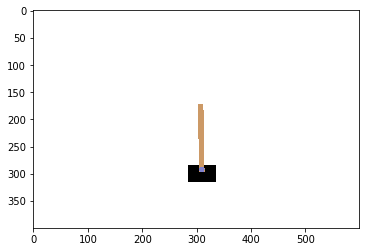

In [10]:
# nb_steps represents the number of steps, you can try and change it
dqn.fit(env, callbacks=[Render()], nb_steps=100, visualize=False, log_interval=10000)

If you are running locally, uncomment this out!

In [ ]:
# #nb_steps represents the number of steps, you can try and change it
# dqn.fit(env, nb_steps=100, visualize=True, verbose=2)

After training is done, we save the final weights.

In [11]:
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

Finally, evaluate our algorithm for 5 episodes.

Episode 5: reward: 9.000, steps: 9


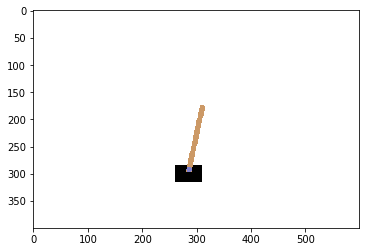

In [12]:
dqn.test(env, nb_episodes=5, callbacks=[Render()], visualize=False)

If you are running locally, uncomment this out!

### SARSA & Expected SARSA

Let's say that:

$$X_t \in \{ v_t, \hat{v_t} \}$$

where in expected SARSA:

$$ v_t = r_t + \gamma \sum_a \pi_t (s_{t+1}, a) Q_t (s_{t+1}, a)$$

and in SARSA:

$$ \hat{v_t} = r_t + \gamma Q_t (s_{t+1}, a_{t+1})$$

Bias is represented by:

$$Bias(s,a) = Q^{\pi} (s,a) - E\{X_t\}$$

Variance is denoted by:

$$Var(s,a) = E\{(X_t)^2\} - (E\{X_t\})^2$$


In [13]:
import gym
import numpy as np
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import Input, Dense, Activation, Flatten
from rl.agents import SARSAAgent
from rl.policy import BoltzmannQPolicy

Get the environment and extract the number of actions.

In [14]:
ENV_NAME = 'CartPole-v0'

env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

Next, we build a very simple model.

In [15]:
inp = Input(shape=(1,) + env.observation_space.shape)
x = Flatten()(inp)
x = Dense(16)(x)
x = Activation('relu')(x)
x = Dense(16)(x)
x = Activation('relu')(x)
x = Dense(16)(x)
x = Activation('relu')(x)
x = Dense(nb_actions)(x)
x = Activation('linear')(x)
model = Model(inputs=inp, outputs=x)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1, 4)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_6 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272 

SARSA does not require a memory.

In [16]:
policy = BoltzmannQPolicy()
sarsa = SARSAAgent(model=model, nb_actions=nb_actions, nb_steps_warmup=10, policy=policy)
sarsa.compile(Adam(lr=1e-3), metrics=['mae'])

Okay, now it's time to learn something! We visualize the training here for show, but this
slows down training quite a lot. You can always safely abort the training prematurely using
Ctrl + C.

  908/10000 [=>............................] - ETA: 32:33 - reward: 1.0000done, took 195.229 seconds


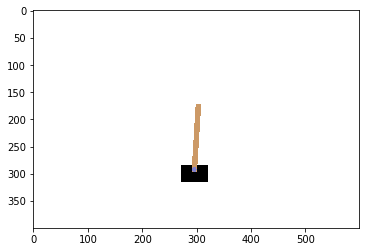

In [17]:
# nb_steps represents the number of steps, you can try and change it
sarsa.fit(env, callbacks=[Render()], nb_steps=1000, log_interval=10000)

If you are running locally, uncomment this out!

In [ ]:
# #nb_steps represents the number of steps, you can try and change it
# sarsa.fit(env, nb_steps=10000, visualize=True, verbose=2)

After training is done, we save the final weights.

In [18]:
sarsa.save_weights('sarsa_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

Finally, evaluate our algorithm for 5 episodes.

Episode 5: reward: 12.000, steps: 12


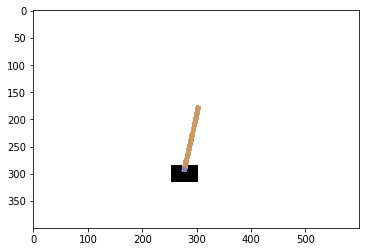

In [19]:
sarsa.test(env, nb_episodes=5, callbacks=[Render()], visualize=False)

If you are running locally, uncomment this out!

In [ ]:
# sarsa.test(env, nb_episodes=5, visualize=True)

### References
- [Playing Atari with Deep Reinforcement Learning](https://arxiv.org/abs/1312.5602), Mnih et al., 2013
- [Human-level control through deep reinforcement learning](http://www.nature.com/nature/journal/v518/n7540/abs/nature14236.html), Mnih et al., 2015
- [Deep Reinforcement Learning with Double Q-learning](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Applications_files/doubledqn.pdf), van Hasselt et al., 2015
- [Dueling Network Architectures for Deep Reinforcement Learning](https://arxiv.org/abs/1511.06581), Wang et al., 2016